# Polynomial linear regression

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path

## Loading the Dataset

In [2]:
raw_data_file_path = '/Users/vishalsaxena/Documents/DS_Workspace/udemy_ml_algo_python/data/raw'
dataset = pd.read_csv(os.path.join(raw_data_file_path, 'Position_Salaries.csv'))
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y = dataset.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Splitting the dataset into train and test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_train, X_test

(array([[ 5],
        [10],
        [ 2],
        [ 7],
        [ 8],
        [ 4],
        [ 1],
        [ 6]]),
 array([[3],
        [9]]))

In [7]:
y_train, y_test

(array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
         150000]),
 array([ 60000, 500000]))

## Train the linear regression model (with train test split)

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lin_reg.predict(X_test)
y_pred, y_test

(array([ 44275.9295499 , 543473.58121331]), array([ 60000, 500000]))

In [10]:
lin_reg.predict([[6.5]])

array([335474.55968689])

## Train the linear regression model

In [11]:
lin_reg.fit(X, y)

LinearRegression()

In [12]:
y_pred = lin_reg.predict([[6.5]])
y_pred

array([330378.78787879])

## Visualising the dataset with linear regression

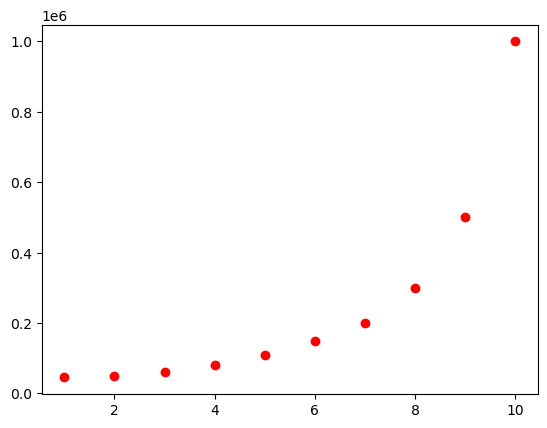

In [20]:
plt.scatter(X, y, color='red')

Text(0, 0.5, 'Salary')

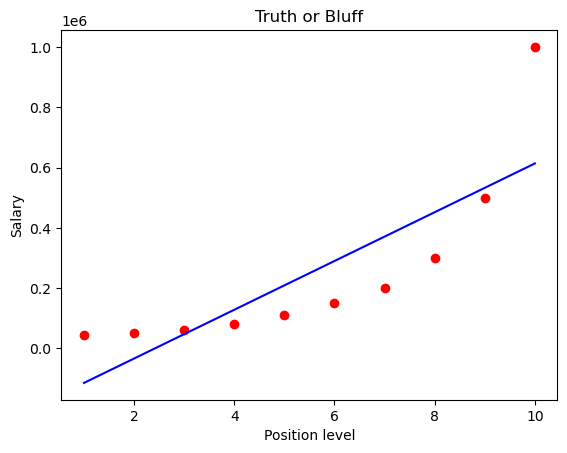

In [24]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title("Truth or Bluff")
plt.xlabel('Position level')
plt.ylabel('Salary')

## Training the polynomial regression model on the whole dataset

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [33]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the dataset with polynomial regression

Text(0, 0.5, 'Salary')

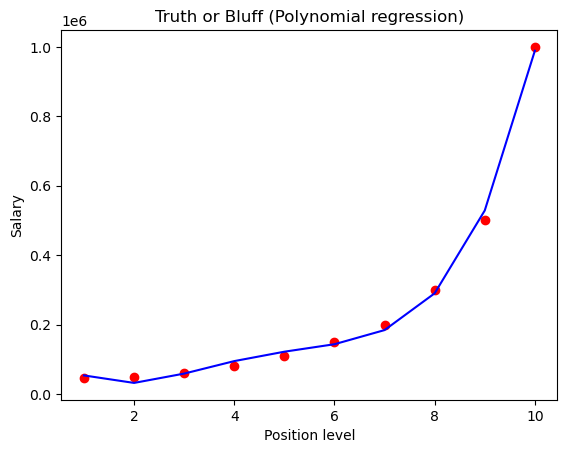

In [34]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.title("Truth or Bluff (Polynomial regression)")
plt.xlabel('Position level')
 

## Predicting the salary with Linear Regression

In [36]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [37]:
lin_reg.coef_

array([80878.78787879])

In [38]:
lin_reg.intercept_

np.float64(-195333.3333333332)

## Predicting the salary with polynomial regression

In [39]:
poly_reg.powers_

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [44]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265152])

In [45]:
lin_reg_2.coef_

array([      0.        , -211002.33100264,   94765.44289054,
        -15463.2867133 ,     890.15151515])

In [46]:
lin_reg_2.intercept_

np.float64(184166.6666670512)